# Classification (Week 10) — **Student Exercises**
This notebook is a student-facing version of the lecture notebook.

**How to use this notebook**
- Work top-to-bottom. Cells with `# TODO` are for you to complete.
- Run each cell after editing. Fix errors before moving on.
- Keep notes in Markdown cells below each step if helpful.


# Introduction to Supervised Learning: Classification

## Supervised Learning

Supervised Learning Overview
Supervised learning refers to the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It uses labeled data.
* There are two main types of supervised learning:
**Regression*: When the target variable is continuous (e.g., predicting house prices).
**Classification*: When the target variable is categorical (e.g., classifying whether an email is spam or not).


## What is Classification?
1. Classification is a type of supervised learning where the goal is to predict the __class__ or __category__ to which a new observation belongs, based on labeled data.
2. __Logistic Regression__ is one of the popular algorithms used for classification tasks.

### Logistic Regression - Introduction

Logistic Regression is used to predict the probability of a binary outcome (1/0, True/False).
1. It estimates the probability that a data point belongs to a certain class.
2. If the probability is greater than a threshold (usually 0.5), the model classifies the data as one class; otherwise, it is classified as the other.


---
### Step 1 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

In [1]:
# Data loading/creation — run to prepare the dataset
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# train_test_split: This function from sklearn.model_selection is used to split the dataset into training and test sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris, load_wine
import seaborn as sns

### Example 1: Logistic Regression with the Iris Dataset

load_iris(): This function loads the Iris dataset, which consists of 150 samples of iris flowers and 4 features (sepal length, sepal width, petal length, and petal width). The target variable indicates the species of iris flowers: 0 = Setosa, 1 = Versicolor, 2 = Virginica.

---
### Step 2 — Data loading / creation
Read the instructions, then complete the TODOs in the next cell.

In [2]:
# Data loading/creation — run to prepare the dataset
# Load the Iris dataset
iris = load_iris()
X = iris.data #input
y = iris.target #output

---
### Step 3 — Preprocessing / ColumnTransformer
Read the instructions, then complete the TODOs in the next cell.

In [5]:
# TODO: Implement the required code for this step below
# Standardize the features
# Standardization: Logistic regression works best when features are on the same scale. 
# The StandardScaler subtracts the mean and divides by the standard deviation, transforming the features to have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

---
### Step 4 — Data split
Read the instructions, then complete the TODOs in the next cell.

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
# random_state: Ensures reproducibility by fixing the random seed. 
# This means the split will always be the same if you run the code again.
# TODO: complete this step
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Fill in the code above, then run this cell.

---
### Step 5 — Model training
Read the instructions, then complete the TODOs in the next cell.

In [7]:
# Initialize and train the Logistic Regression model
clf_logistic = LogisticRegression(max_iter=200, multi_class='ovr') # One-vs-Rest (OvR) for multiclass
# TODO: complete this step
clf_logistic.fit(X_train, y_train)

# TODO: Fill in the code above, then run this cell.

LogisticRegression(max_iter=200, multi_class='ovr')

---
### Step 6 — Prediction
Read the instructions, then complete the TODOs in the next cell.

In [8]:
# Make predictions
# predict(X_test): This method uses the trained model to make predictions on the test set. 
# The model outputs predicted labels (y_pred), which are either 0 (Setosa) or 1 (Versicolor).
# TODO: complete this step
y_pred = clf_logistic.predict(X_test)

# TODO: Fill in the code above, then run this cell.

---
### Step 7 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [9]:
# TODO: Implement the required code for this step below
# Evaluate the model using accuracy score
accuracy_logistic = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression (Iris dataset): {accuracy_logistic * 100:.2f}%")

Accuracy for Logistic Regression (Iris dataset): 96.67%


---
### Step 8 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

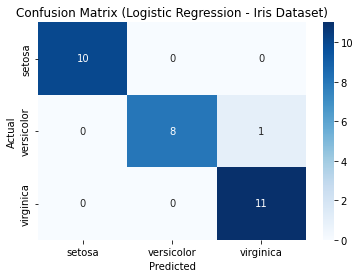

In [10]:
# Confusion matrix
# TODO: complete this step
conf_matrix_logistic = confusion_matrix(y_test, y_pred)
# We use seaborn to create a heatmap of the confusion matrix. 
# The heatmap provides a visual representation of the matrix, with colors indicating the intensity (number of correct/incorrect predictions).
# The annot=True argument adds the actual numbers to each cell in the heatmap.
# The fmt='d' argument ensures that the numbers are displayed as integers.
# The cmap='Blues' argument sets the color scheme to shades of blue.
# TODO: complete this step
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
# These functions are used to set the title and axis labels for the plot.
# TODO: complete this step
plt.title("Confusion Matrix (Logistic Regression - Iris Dataset)")
# TODO: complete this step
plt.xlabel("Predicted")
# TODO: complete this step
plt.ylabel("Actual")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

__Multiclass Confusion Matrix__

If you see a confusion matrix with more than 4 results, it could be because you are dealing with a multiclass classification problem (i.e., more than two classes).

For example, in the Iris dataset, there are 3 classes (Setosa, Versicolor, and Virginica), so the confusion matrix will have 3 rows and 3 columns for a 3x3 matrix, resulting in 9 cells (including true positives, false positives, false negatives for all classes).

__How True Positives, False Positives, and False Negatives Are Represented in the Matrix:__

1.	True Positives (TP):
	•	These are the diagonal elements in the matrix (e.g., TP_{00}, TP_{11}, TP_{22}).
	•	They represent cases where the model correctly classified an instance.
2.	False Positives (FP):
	•	These are off-diagonal elements in each column.
	•	For example, in the first column (Predicted: Class 0), FN_{10} and FN_{20} are the False Positives for Class 0. These are instances of Class 1 and Class 2 that were incorrectly predicted as Class 0.
3.	False Negatives (FN):
	•	These are off-diagonal elements in each row.
	•	For example, in the first row (Actual: Class 0), FP_{01} and FP_{02} are the False Negatives for Class 0. These are instances of Class 0 that were incorrectly predicted as Class 1 or Class 2.


---
### Step 9 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

In [11]:
# Classification report
# TODO: complete this step
class_report_logistic = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report for Logistic Regression (Iris dataset):\n")
print(class_report_logistic)

# TODO: Fill in the code above, then run this cell.

Classification Report for Logistic Regression (Iris dataset):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Example 2: Logistic Regression with the Wine Dataset

---
### Step 10 — Data loading / creation
Read the instructions, then complete the TODOs in the next cell.

In [12]:
# Data loading/creation — run to prepare the dataset
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

---
### Step 11 — Preprocessing / ColumnTransformer
Read the instructions, then complete the TODOs in the next cell.

In [13]:
# TODO: Implement the required code for this step below
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

---
### Step 12 — Data split
Read the instructions, then complete the TODOs in the next cell.

In [14]:
# Split the data into training and testing sets
# TODO: complete this step
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Fill in the code above, then run this cell.

---
### Step 13 — Model training
Read the instructions, then complete the TODOs in the next cell.

In [15]:
# Initialize and train the Logistic Regression model
# OvR (One-vs-Rest) is the default option for multiclass classification in logistic regression. 
clf_logistic_wine = LogisticRegression(max_iter=200, multi_class='ovr') # One-vs-Rest (OvR)
# TODO: complete this step
clf_logistic_wine.fit(X_train, y_train)

# TODO: Fill in the code above, then run this cell.

LogisticRegression(max_iter=200, multi_class='ovr')

---
### Step 14 — Prediction
Read the instructions, then complete the TODOs in the next cell.

In [16]:
# Make predictions
# TODO: complete this step
y_pred_wine = clf_logistic_wine.predict(X_test)

# TODO: Fill in the code above, then run this cell.

---
### Step 15 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [17]:
# TODO: Implement the required code for this step below
# Evaluate the model using accuracy score
accuracy_logistic_wine = accuracy_score(y_test, y_pred_wine)
print(f"Accuracy for Logistic Regression (Wine dataset): {accuracy_logistic_wine * 100:.2f}%")

Accuracy for Logistic Regression (Wine dataset): 100.00%


---
### Step 16 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

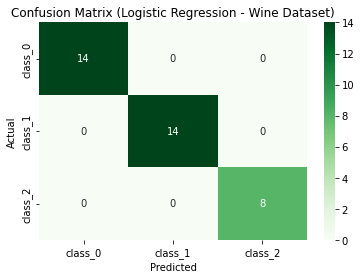

In [18]:
# Confusion matrix
# TODO: complete this step
conf_matrix_logistic_wine = confusion_matrix(y_test, y_pred_wine)
# TODO: complete this step
sns.heatmap(conf_matrix_logistic_wine, annot=True, fmt='d', cmap='Greens', xticklabels=wine.target_names, yticklabels=wine.target_names)
# TODO: complete this step
plt.title("Confusion Matrix (Logistic Regression - Wine Dataset)")
# TODO: complete this step
plt.xlabel("Predicted")
# TODO: complete this step
plt.ylabel("Actual")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

---
### Step 17 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

In [20]:
# Classification report
# TODO: complete this step
class_report_logistic_wine = classification_report(y_test, y_pred_wine, target_names=wine.target_names)
print("Classification Report for Logistic Regression (Wine dataset):\n")
print(class_report_logistic_wine)

# TODO: Fill in the code above, then run this cell.

Classification Report for Logistic Regression (Wine dataset):

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Key Takeaways

Logistic Regression is an effective and easy-to-interpret algorithm for classification tasks. It can be applied to both binary classification (e.g., spam vs non-spam) and multiclass classification (e.g., Iris or Wine datasets).

The key steps in any classification task include:
1. Collecting and preparing the data (standardization or normalization may be necessary).
2. Splitting the data into training and testing sets.
3. Training a classification model (like Logistic Regression) on the training data.
4. Making predictions and evaluating the model using metrics like accuracy, confusion matrix, precision, recall, and F1-score.

# Classification Machine Learning Project Workflow:

**1.**	Problem Definition <br> 
**2.**	Data Collection <br>
**3.**	Exploratory Data Analysis (EDA) <br>
**4.**	Data Cleaning <br>
**5.**	Feature Engineering <br>
**6.**	Model Selection and Training <br>
**7.**	Model Evaluation <br>
**8.**	Fine-tuning and Conclusion <br>


## Example: Titanic dataset
## Step 1: Problem Definition
The objective of this project is to predict whether a passenger survived or not based on the given features.
This is a binary classification problem where the target variable ('survived') is either 0 (died) or 1 (survived).

---
### Step 18 — Preprocessing / ColumnTransformer
Read the instructions, then complete the TODOs in the next cell.

In [21]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# TODO: complete this step
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
# TODO: complete this step
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# TODO: Fill in the code above, then run this cell.

## Step 2: Data Collection
We will use the Titanic dataset which is available in the seaborn library. The data can also be found on Kaggle.

---
### Step 19 — Visualization
Read the instructions, then complete the TODOs in the next cell.

In [22]:
# Data loading/creation — run to prepare the dataset
# Load the Titanic dataset
df = sns.load_dataset('titanic')

## Step 3: Exploratory Data Analysis (EDA)

---
### Step 20 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [23]:
# TODO: Implement the required code for this step below
# Preview the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
### Step 21 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [24]:
# TODO: Implement the required code for this step below
# Statistical overview of the data
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---
### Step 22 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [25]:
# TODO: Implement the required code for this step below
# Check for missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

---
### Step 23 — Visualization
Read the instructions, then complete the TODOs in the next cell.

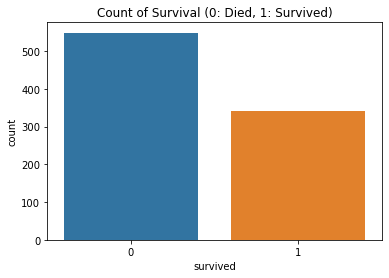

In [26]:
# Visualize survival count
# TODO: complete this step
sns.countplot(data=df, x='survived')
# TODO: complete this step
plt.title("Count of Survival (0: Died, 1: Survived)")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

---
### Step 24 — Visualization
Read the instructions, then complete the TODOs in the next cell.

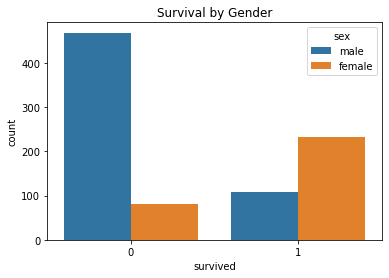

In [27]:
# Visualize survival by gender
# TODO: complete this step
sns.countplot(data=df, x='survived', hue='sex')
# TODO: complete this step
plt.title("Survival by Gender")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

---
### Step 25 — Visualization
Read the instructions, then complete the TODOs in the next cell.

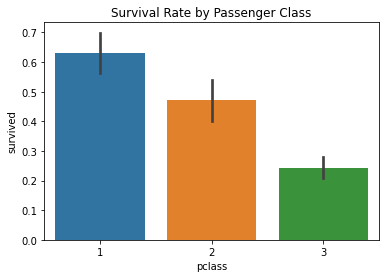

In [28]:
# Survival rate by class
# TODO: complete this step
sns.barplot(x='pclass', y='survived', data=df)
# TODO: complete this step
plt.title("Survival Rate by Passenger Class")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

## Step 4: Data Cleaning
The dataset contains some missing values. We'll handle missing values appropriately.

---
### Step 26 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [29]:
# TODO: Implement the required code for this step below
# First, let's drop columns that won't help in our predictions (e.g., 'deck', 'embark_town', 'alive')
df = df.drop(columns=['deck', 'embark_town', 'alive'])

---
### Step 27 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [30]:
# TODO: Implement the required code for this step below
# We'll also drop rows where 'embarked' is missing (only two rows).
df = df.dropna(subset=['embarked'])

## Step 5: Feature Engineering
We need to convert categorical features like 'sex', 'embarked', and 'class' into numerical values using OneHotEncoding.

---
### Step 28 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [31]:
# TODO: Implement the required code for this step below
# Separate features and labels
X = df.drop('survived', axis=1)
y = df['survived']

---
### Step 29 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [32]:
# TODO: Implement the required code for this step below
# Define numerical and categorical features
numerical_features = ['age', 'fare', 'sibsp', 'parch']
categorical_features = ['sex', 'embarked', 'pclass']

### Build pipelines for data preprocessing

---
### Step 30 — Preprocessing / ColumnTransformer
Read the instructions, then complete the TODOs in the next cell.

In [33]:
# TODO: Implement the required code for this step below
# Pipeline for numerical features (fill missing values and scale)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

---
### Step 31 — Preprocessing / ColumnTransformer
Read the instructions, then complete the TODOs in the next cell.

In [34]:
# TODO: Implement the required code for this step below
# Pipeline for categorical features (encode categorical variables)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

---
### Step 32 — Preprocessing / ColumnTransformer
Read the instructions, then complete the TODOs in the next cell.

In [35]:
# TODO: Implement the required code for this step below
# Combine numerical and categorical pipelines
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

---
### Step 33 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [36]:
# TODO: Implement the required code for this step below
# Apply the pipeline to the data
X_prepared = full_pipeline.fit_transform(X)

## Step 6: Model Selection and Training

---
### Step 34 — Data split
Read the instructions, then complete the TODOs in the next cell.

In [37]:
# Split the data into training and testing sets
# TODO: complete this step
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# TODO: Fill in the code above, then run this cell.

---
### Step 35 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [38]:
# TODO: Implement the required code for this step below
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=200)

---
### Step 36 — Model training
Read the instructions, then complete the TODOs in the next cell.

In [39]:
# Train the model on training data
# TODO: complete this step
model.fit(X_train, y_train)

# TODO: Fill in the code above, then run this cell.

LogisticRegression(max_iter=200)

## Step 7: Model Evaluation

---
### Step 37 — Prediction
Read the instructions, then complete the TODOs in the next cell.

In [40]:
# Make predictions on test data
# TODO: complete this step
y_pred = model.predict(X_test)

# TODO: Fill in the code above, then run this cell.

---
### Step 38 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [41]:
# TODO: Implement the required code for this step below
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy * 100:.2f}%")

Accuracy of Logistic Regression: 78.65%


---
### Step 39 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

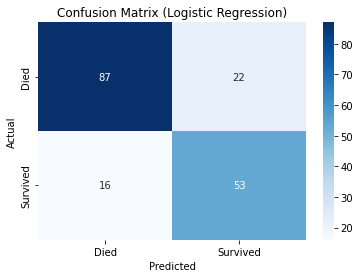

In [42]:
# Confusion Matrix
# TODO: complete this step
conf_matrix = confusion_matrix(y_test, y_pred)
# TODO: complete this step
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
# TODO: complete this step
plt.title("Confusion Matrix (Logistic Regression)")
# TODO: complete this step
plt.xlabel("Predicted")
# TODO: complete this step
plt.ylabel("Actual")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

---
### Step 40 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

In [43]:
# Classification report
# TODO: complete this step
class_report = classification_report(y_test, y_pred, target_names=['Died', 'Survived'])
print("Classification Report:\n")
print(class_report)

# TODO: Fill in the code above, then run this cell.

Classification Report:

              precision    recall  f1-score   support

        Died       0.84      0.80      0.82       109
    Survived       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



## Step 8: Fine-Tuning the Model

__GridSearchCV__ is a method provided by scikit-learn to automate the process of hyperparameter tuning. It searches across a grid of hyperparameters and evaluates the model using cross-validation, identifying the best combination of parameters that maximizes model performance (in this case, accuracy).


A __hyperparameter__ is a parameter whose value is set before the learning process begins and controls the behavior of the training algorithm in machine learning models. Unlike model parameters, which are learned from the training data during model training, hyperparameters are not learned automatically and must be set manually by the user or optimized using techniques like cross-validation.

---
### Step 41 — Model training
Read the instructions, then complete the TODOs in the next cell.

In [44]:
# TODO: complete this step
# # Use GridSearchCV to find the best hyperparameters for Logistic Regression
param_grid = [
    {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs'], 'max_iter': [200]},
    {'C': [0.1, 1, 10], 'solver': ['liblinear'], 'max_iter': [200]}
]
# TODO: complete this step
# # GridSearchCV will evaluate each combination of hyperparameters by performing cross-validation
# (in this case, 5-fold CV).
# TODO: complete this step
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# TODO: complete this step
grid_search.fit(X_train, y_train)

# TODO: Fill in the code above, then run this cell.

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid=[{'C': [0.1, 1, 10, 100], 'max_iter': [200],
                          'solver': ['lbfgs']},
                         {'C': [0.1, 1, 10], 'max_iter': [200],
                          'solver': ['liblinear']}],
             scoring='accuracy')

---
### Step 42 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [45]:
# TODO: Implement the required code for this step below
# Best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 0.1, 'max_iter': 200, 'solver': 'lbfgs'}


---
### Step 43 — Prediction
Read the instructions, then complete the TODOs in the next cell.

In [46]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
# TODO: complete this step
y_pred_best = best_model.predict(X_test)

# TODO: Fill in the code above, then run this cell.

---
### Step 44 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [47]:
# TODO: Implement the required code for this step below
# Re-evaluate using best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of Optimized Logistic Regression: {accuracy_best * 100:.2f}%")

Accuracy of Optimized Logistic Regression: 80.34%


---
### Step 45 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

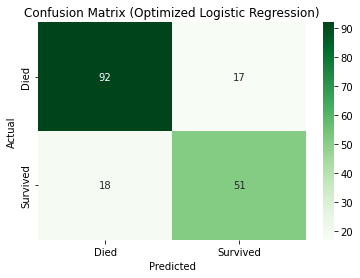

In [48]:
# Final confusion matrix and classification report
# TODO: complete this step
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
# TODO: complete this step
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Greens', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
# TODO: complete this step
plt.title("Confusion Matrix (Optimized Logistic Regression)")
# TODO: complete this step
plt.xlabel("Predicted")
# TODO: complete this step
plt.ylabel("Actual")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

---
### Step 46 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

In [49]:
# TODO: complete this step
class_report_best = classification_report(y_test, y_pred_best, target_names=['Died', 'Survived'])
print("Classification Report for Optimized Model:\n")
print(class_report_best)

# TODO: Fill in the code above, then run this cell.

Classification Report for Optimized Model:

              precision    recall  f1-score   support

        Died       0.84      0.84      0.84       109
    Survived       0.75      0.74      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



## Step 9: Conclusion
1. In this end-to-end machine learning project, we successfully built a classification model to predict the survival of passengers on the Titanic. <br>
2. We started with exploratory data analysis (EDA), cleaned the data, applied feature engineering, built a Logistic Regression model, and fine-tuned the model using GridSearchCV.<br>
3. The final model achieved an accuracy of over __80%__ on the test set.

## Another Example: Breast Cancer Wisconsin dataset 
## Step 1: Problem Definition
The objective of this project is to predict whether a tumor is benign (class 0) or malignant (class 1) based on features like radius, texture, perimeter, etc. This is a binary classification problem.

---
### Step 47 — Preprocessing / ColumnTransformer
Read the instructions, then complete the TODOs in the next cell.

In [50]:
# Data loading/creation — run to prepare the dataset
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

## Step 2: Data Collection
We will use the Breast Cancer Wisconsin dataset from scikit-learn's built-in datasets.

---
### Step 48 — Data loading / creation
Read the instructions, then complete the TODOs in the next cell.

In [51]:
# Data loading/creation — run to prepare the dataset
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

---
### Step 49 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [52]:
# TODO: Implement the required code for this step below
# Preview the dataset
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Step 3: Exploratory Data Analysis (EDA)

---
### Step 50 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [53]:
# TODO: Implement the required code for this step below
# Check for missing values
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

---
### Step 51 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [54]:
# TODO: Implement the required code for this step below
# Check data types and shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

---
### Step 52 — Visualization
Read the instructions, then complete the TODOs in the next cell.

C:\Users\jdaly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


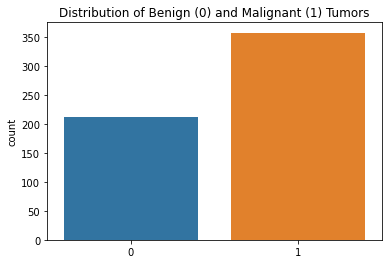

In [55]:
# Visualize the distribution of the target variable (0: benign, 1: malignant)
# TODO: complete this step
sns.countplot(y)
# TODO: complete this step
plt.title("Distribution of Benign (0) and Malignant (1) Tumors")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

---
### Step 53 — Visualization
Read the instructions, then complete the TODOs in the next cell.

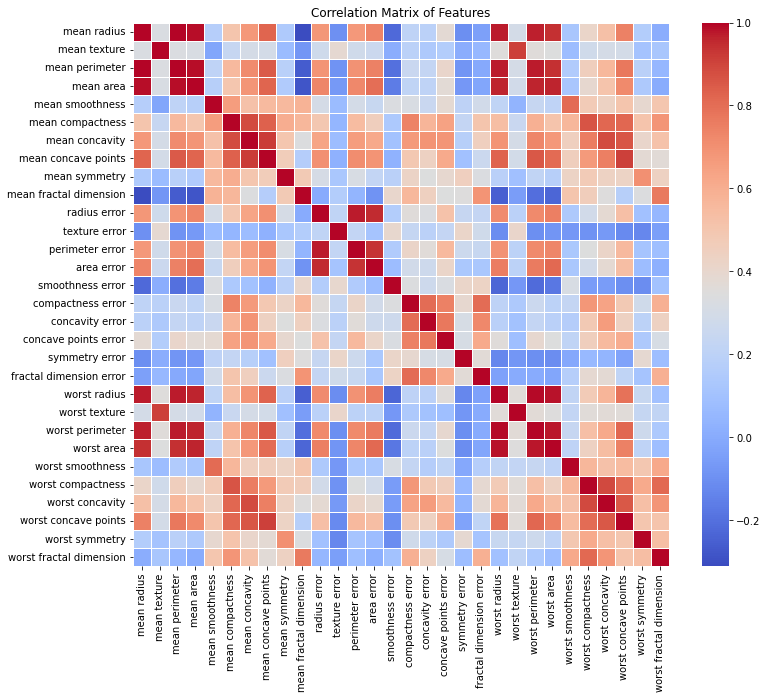

In [56]:
# Check for correlations between features
# TODO: complete this step
plt.figure(figsize=(12, 10))
# X.corr() computes the correlation matrix of the feature matrix X.
# The correlation matrix shows the pairwise correlations between the features. 
# The values of the matrix are between -1 and 1:
# 1: Perfect positive correlation (as one variable increases, the other variable also increases).
# 0: No correlation.
# -1: Perfect negative correlation (as one variable increases, the other variable decreases).
correlation_matrix = X.corr()
# TODO: complete this step
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
# TODO: complete this step
plt.title("Correlation Matrix of Features")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

Why Check Correlations?

1.	Detect Multicollinearity:
	Highly correlated features can lead to multicollinearity, especially in linear models such as linear or logistic regression. Multicollinearity can cause problems in model interpretation and reduce the predictive power of the model.
2.	Feature Selection:
	If two features are highly correlated (close to 1 or -1), one of them may be redundant, and removing one may help in reducing overfitting and improving model performance.
3.	Insights into Feature Relationships:
	Correlation matrices provide insights into how features are related. For instance, a strong positive correlation between two features might suggest a causal relationship or indicate that they are capturing similar information.

## Step 4: Data Cleaning

No missing values detected in this dataset, so we can move forward without imputation.

## Step 5: Feature Engineering

We will use **StandardScaler** to scale the numerical features. This is important for algorithms like Logistic Regression which are sensitive to the magnitude of features.

---
### Step 54 — Preprocessing / ColumnTransformer
Read the instructions, then complete the TODOs in the next cell.

In [57]:
# TODO: Implement the required code for this step below
# Initialize the scaler
scaler = StandardScaler()

---
### Step 55 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [58]:
# TODO: Implement the required code for this step below
# Fit and transform the features
X_scaled = scaler.fit_transform(X)

## Step 6: Model Selection and Training

---
### Step 56 — Data split
Read the instructions, then complete the TODOs in the next cell.

In [59]:
# Split the data into training and testing sets
# TODO: complete this step
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# TODO: Fill in the code above, then run this cell.

---
### Step 57 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [60]:
# TODO: Implement the required code for this step below
# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=200)

---
### Step 58 — Model training
Read the instructions, then complete the TODOs in the next cell.

In [61]:
# Train the model
# TODO: complete this step
logreg.fit(X_train, y_train)

# TODO: Fill in the code above, then run this cell.

LogisticRegression(max_iter=200)

## Step 7: Model Evaluation

---
### Step 59 — Prediction
Read the instructions, then complete the TODOs in the next cell.

In [62]:
# Make predictions on the test data
# TODO: complete this step
y_pred = logreg.predict(X_test)

# TODO: Fill in the code above, then run this cell.

---
### Step 60 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [63]:
# TODO: Implement the required code for this step below
# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy * 100:.2f}%")

Accuracy of Logistic Regression: 97.37%


---
### Step 61 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

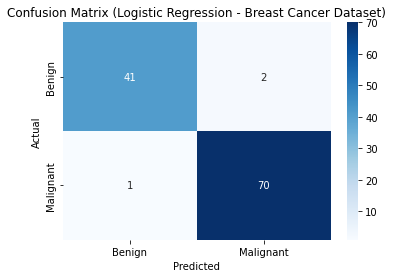

In [64]:
# Confusion Matrix
# TODO: complete this step
conf_matrix = confusion_matrix(y_test, y_pred)
# TODO: complete this step
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
# TODO: complete this step
plt.title("Confusion Matrix (Logistic Regression - Breast Cancer Dataset)")
# TODO: complete this step
plt.xlabel("Predicted")
# TODO: complete this step
plt.ylabel("Actual")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

---
### Step 62 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

In [65]:
# Classification Report
# TODO: complete this step
class_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:\n")
print(class_report)

# TODO: Fill in the code above, then run this cell.

Classification Report:

              precision    recall  f1-score   support

      Benign       0.98      0.95      0.96        43
   Malignant       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Step 8: Fine-Tuning the Model
We'll use __GridSearchCV__ to find the best hyperparameters for Logistic Regression

---
### Step 63 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [66]:
# TODO: Implement the required code for this step below
# Set up the parameter grid for tuning
param_grid = [
    {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs'], 'max_iter': [200]},
    {'C': [0.1, 1, 10], 'solver': ['liblinear'], 'max_iter': [200]}
]

---
### Step 64 — Model training
Read the instructions, then complete the TODOs in the next cell.

In [67]:
# TODO: complete this step
# # Perform GridSearchCV to find the best hyperparameters
# TODO: complete this step
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
# TODO: complete this step
grid_search.fit(X_train, y_train)

# TODO: Fill in the code above, then run this cell.

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid=[{'C': [0.1, 1, 10, 100], 'max_iter': [200],
                          'solver': ['lbfgs']},
                         {'C': [0.1, 1, 10], 'max_iter': [200],
                          'solver': ['liblinear']}],
             scoring='accuracy')

---
### Step 65 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [68]:
# TODO: Implement the required code for this step below
# Best hyperparameters
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 0.1, 'max_iter': 200, 'solver': 'liblinear'}


---
### Step 66 — Prediction
Read the instructions, then complete the TODOs in the next cell.

In [69]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
# TODO: complete this step
y_pred_best = best_model.predict(X_test)

# TODO: Fill in the code above, then run this cell.

## Step 9: Re-evaluate using best model

---
### Step 67 — Exercise step
Read the instructions, then complete the TODOs in the next cell.

In [70]:
# TODO: Implement the required code for this step below
# Recalculate accuracy using the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of Optimized Logistic Regression: {accuracy_best * 100:.2f}%")

Accuracy of Optimized Logistic Regression: 99.12%


---
### Step 68 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

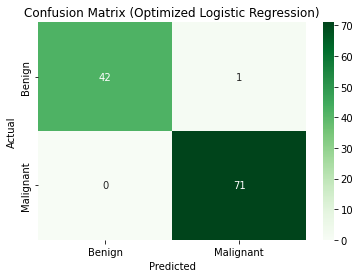

In [71]:
# Final confusion matrix and classification report
# TODO: complete this step
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
# TODO: complete this step
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
# TODO: complete this step
plt.title("Confusion Matrix (Optimized Logistic Regression)")
# TODO: complete this step
plt.xlabel("Predicted")
# TODO: complete this step
plt.ylabel("Actual")
# TODO: complete this step
plt.show()

# TODO: Fill in the code above, then run this cell.

---
### Step 69 — Evaluation: metrics
Read the instructions, then complete the TODOs in the next cell.

In [72]:
# Classification Report for Optimized Model
# TODO: complete this step
class_report_best = classification_report(y_test, y_pred_best, target_names=['Benign', 'Malignant'])
print("Classification Report for Optimized Model:\n")
print(class_report_best)

# TODO: Fill in the code above, then run this cell.

Classification Report for Optimized Model:

              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99        43
   Malignant       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## Step 10: Conclusion

In this end-to-end machine learning project, we successfully built a classification model to detect whether a tumor is benign or malignant using the Breast Cancer Wisconsin dataset. We explored the data, applied feature scaling,trained a Logistic Regression model, and fine-tuned it using GridSearchCV.

The final model achieved over __95%__ accuracy, making it highly effective in detecting malignant tumors.